# <font color = 'orange' > Retailsales</font>

### import important libraries and modules

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder


In [177]:
import datetime as dt

In [178]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

### load data set

In [180]:
data = pd.read_csv("retailsales.csv")

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [182]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [183]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [184]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [185]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [186]:
object_cols = data.select_dtypes(include=['object']).columns
object_cols

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Date', 'Time', 'Payment'],
      dtype='object')

In [187]:
# Drop object columns
df_filtered = data.drop(object_cols, axis=1)
df_filtered

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175,6.2
996,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900,4.4
997,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920,7.7
998,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910,4.1


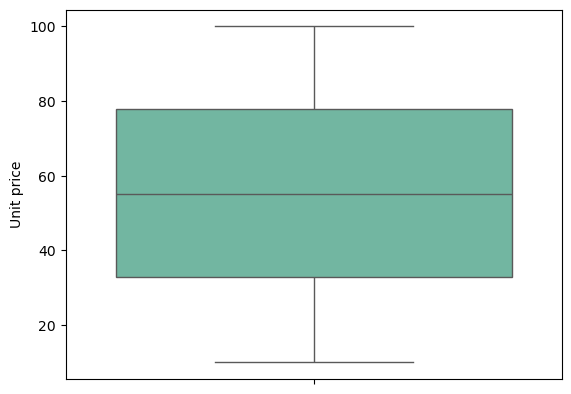

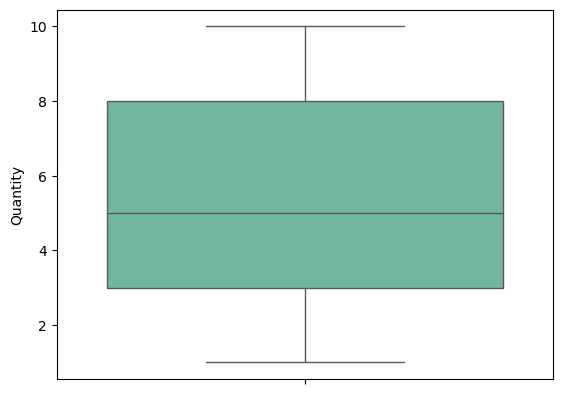

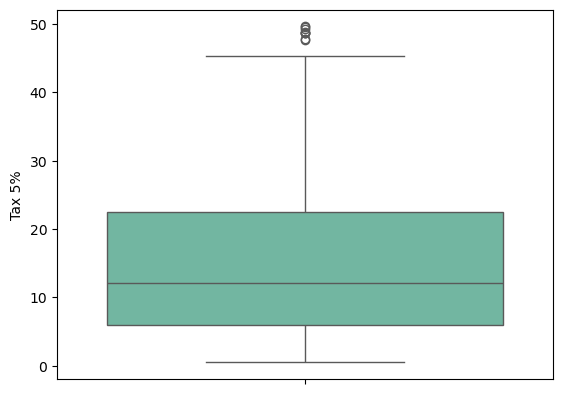

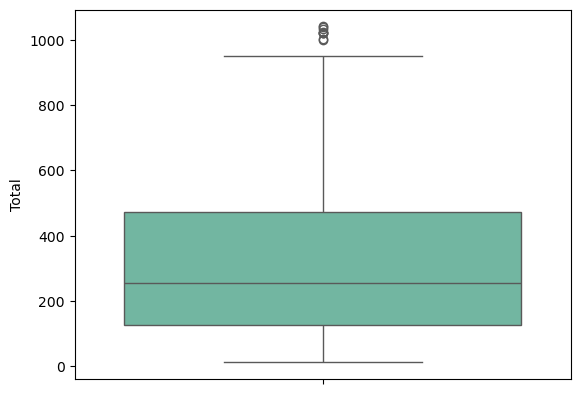

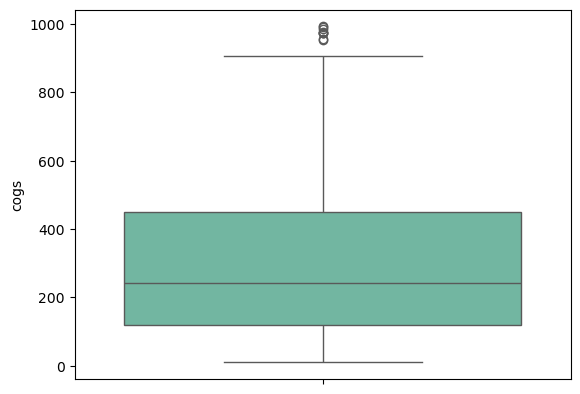

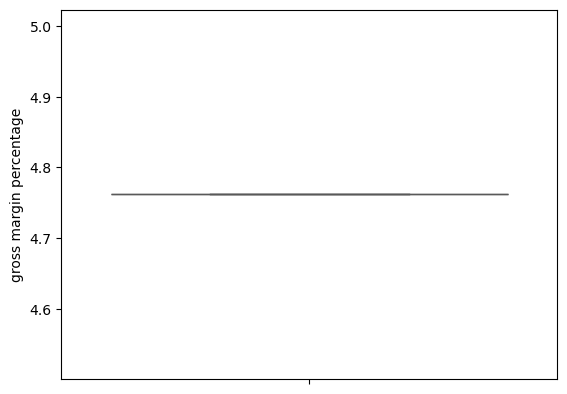

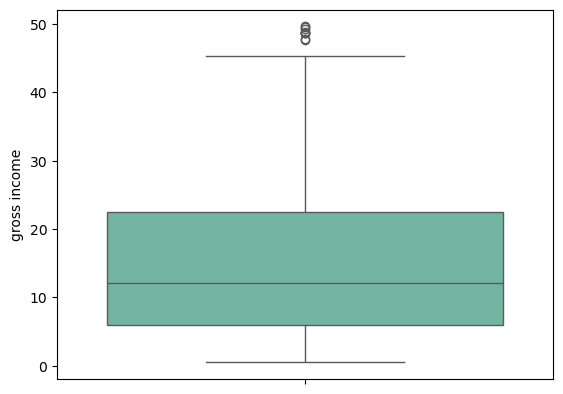

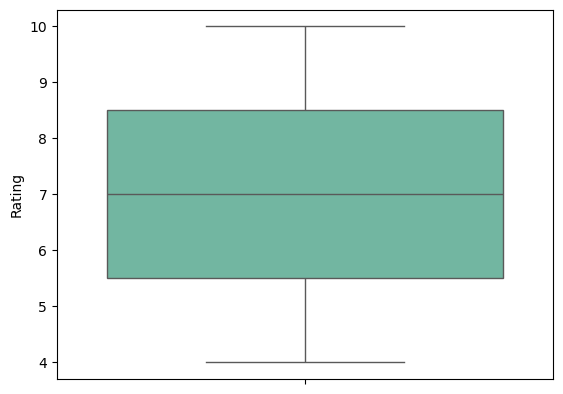

In [188]:
for i in df_filtered:
    sns.boxplot(df_filtered[i],palette='Set2')
    plt.show()

In [189]:
# Find Q1 for all columns
q1 = df_filtered.quantile(0.25)
# q1

In [190]:
q3 = df_filtered.quantile(0.75)
# q3

In [191]:
IQR = q3 - q1
# IQR

In [192]:
upper_range = q3+ 1.5 * IQR
# upper_range

In [193]:
outlier_upper_tax = np.where(df_filtered['Tax 5%'] > upper_range['Tax 5%'])
outlier_upper_tax

(array([166, 167, 350, 357, 422, 557, 699, 792, 996], dtype=int64),)

In [194]:
outlier_upper_total = np.where(df_filtered['Total'] > upper_range['Total'])
outlier_upper_total

(array([166, 167, 350, 357, 422, 557, 699, 792, 996], dtype=int64),)

In [195]:
outlier_upper_cogs = np.where(df_filtered['cogs'] > upper_range['cogs'])
outlier_upper_cogs

(array([166, 167, 350, 357, 422, 557, 699, 792, 996], dtype=int64),)

In [196]:
outlier_upper_grossincome = np.where(df_filtered['gross income'] > upper_range['gross income'])
outlier_upper_grossincome

(array([166, 167, 350, 357, 422, 557, 699, 792, 996], dtype=int64),)

In [197]:
# Removing the outliers
data.drop(outlier_upper_tax[0],inplace = True)

In [198]:
data.reset_index()

,index,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9
987,995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
988,997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
989,998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [199]:
# Drop object columns
df_filtered = data.drop(object_cols, axis=1)


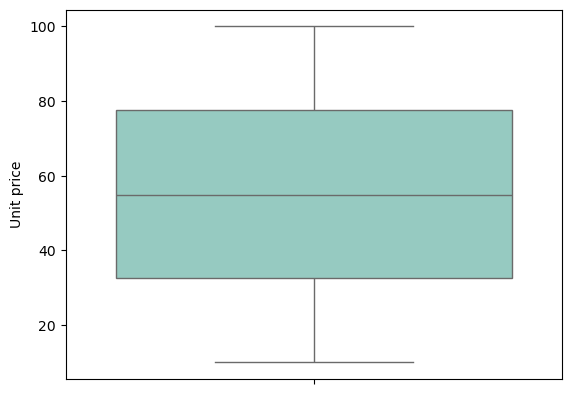

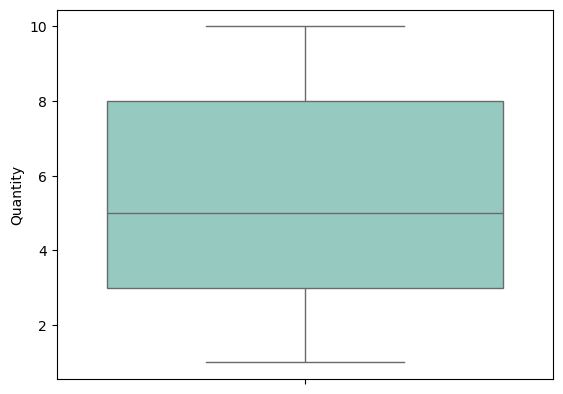

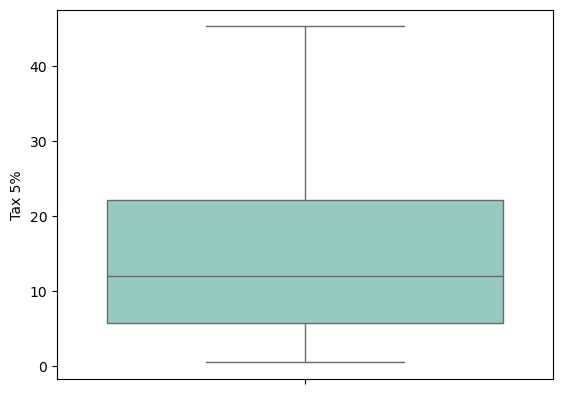

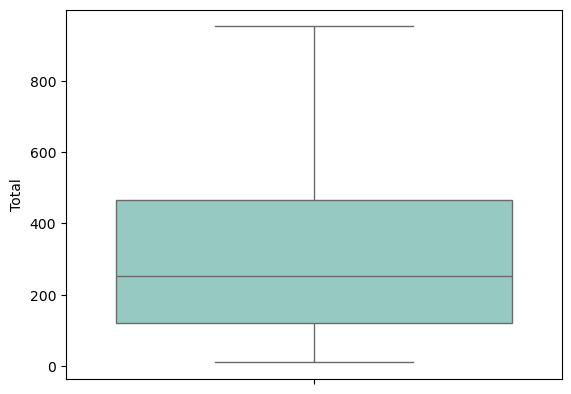

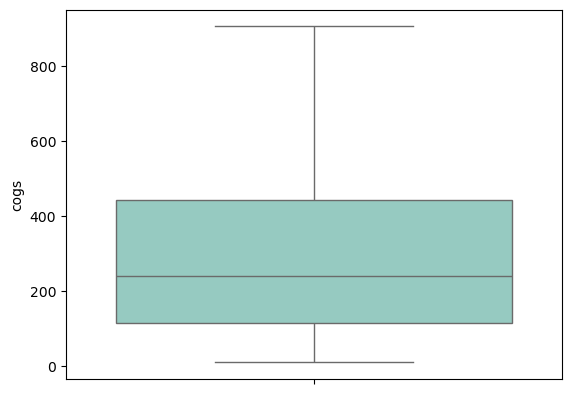

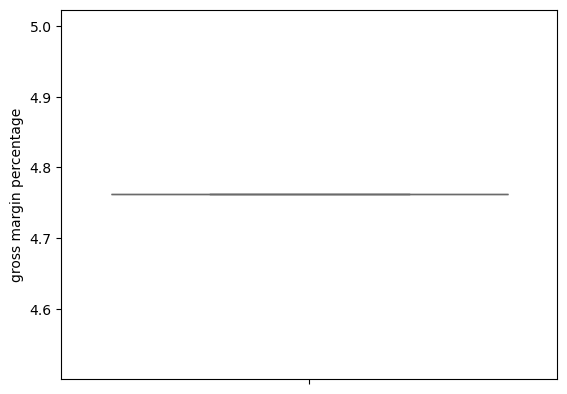

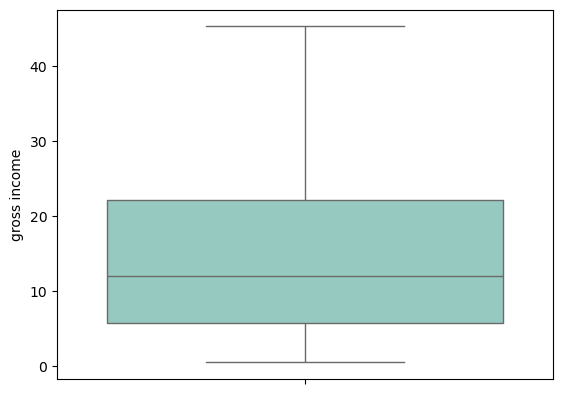

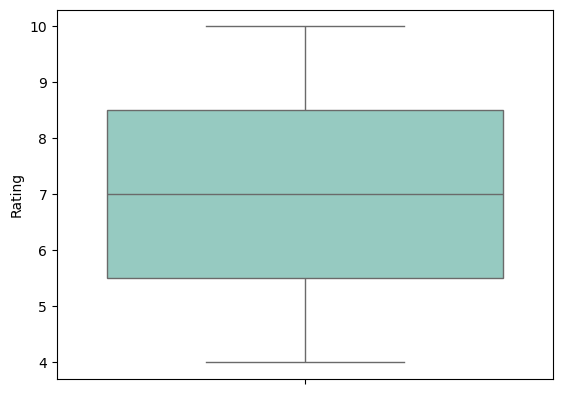

In [200]:
for i in df_filtered:
    sns.boxplot(data[i],palette='Set3')
    plt.show()

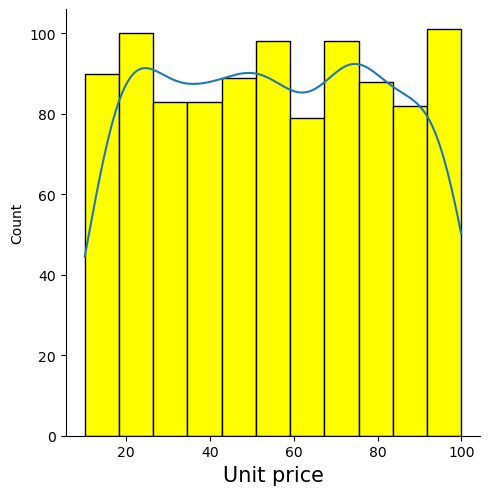

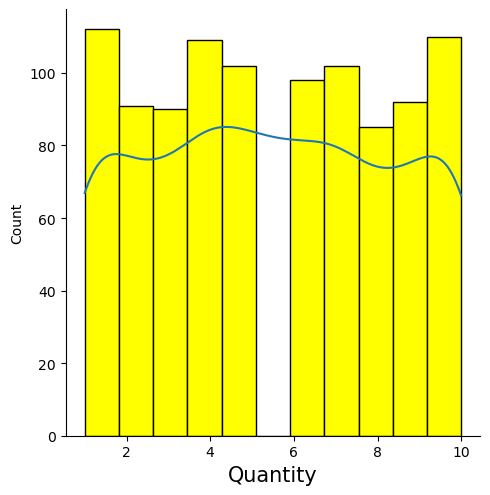

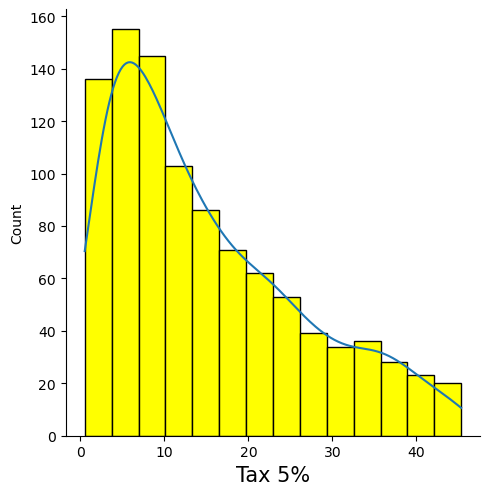

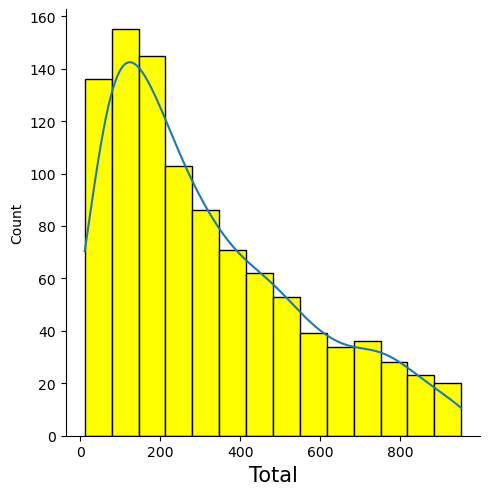

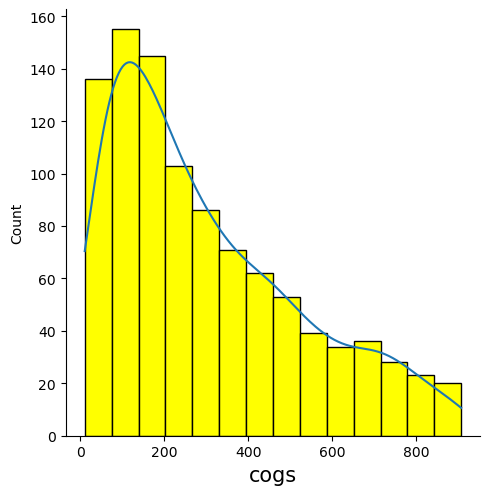

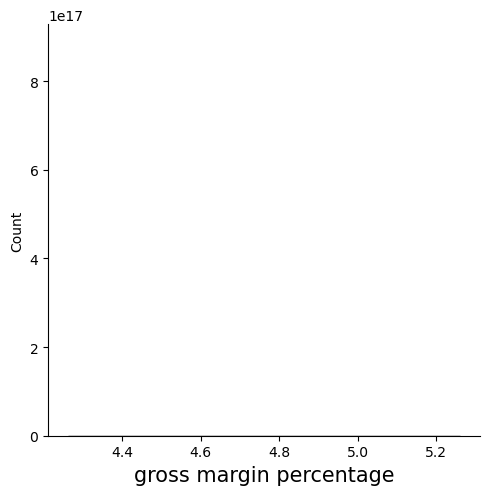

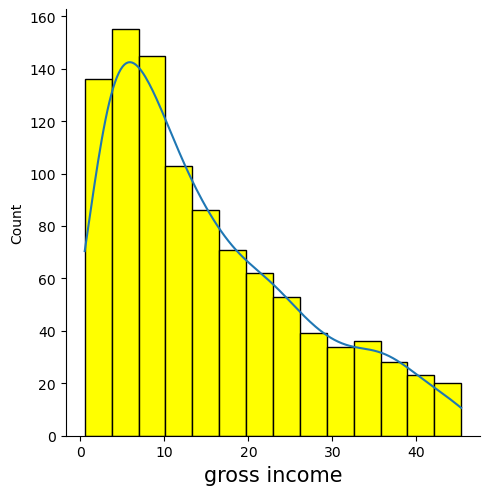

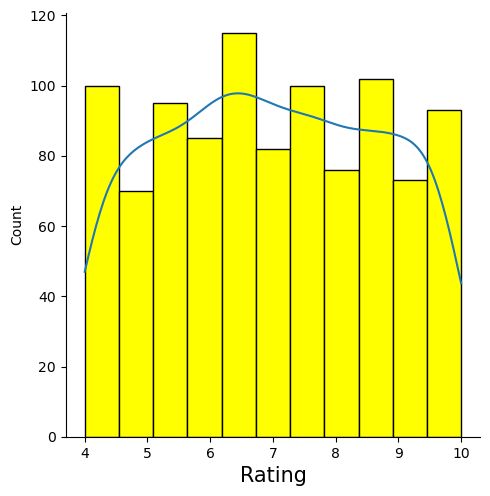

In [201]:
for column in df_filtered:    
    sns.displot(df_filtered[column],facecolor='yellow',kde= True)
    plt.xlabel(column,fontsize = 15)
plt.show()

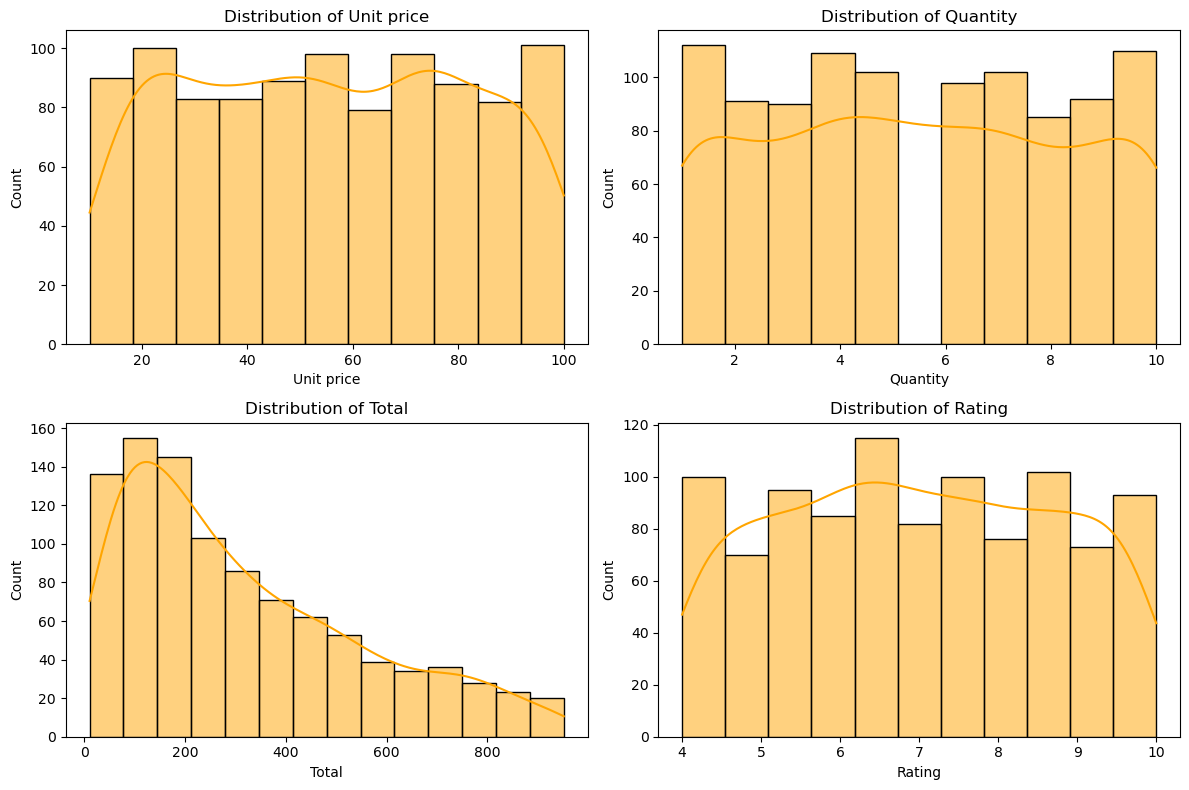

In [202]:
numeric_cols = ['Unit price', 'Quantity', 'Total', 'Rating']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True, color='orange')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

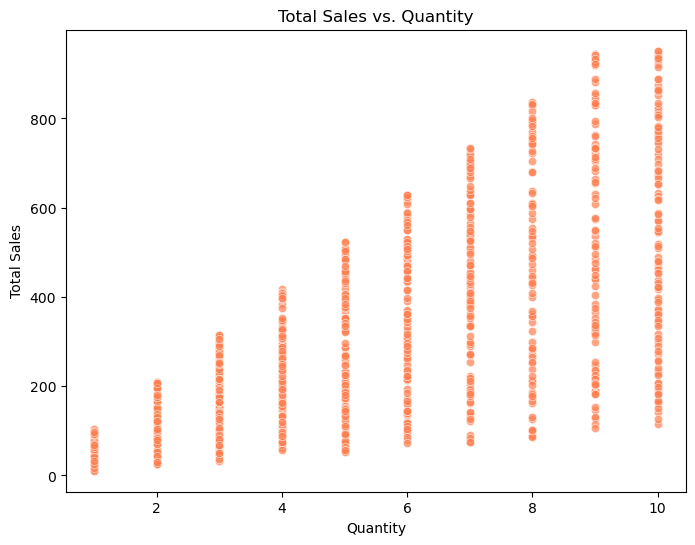

In [203]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Quantity', y='Total', color='coral', alpha=0.7)
plt.title('Total Sales vs. Quantity')
plt.xlabel('Quantity')
plt.ylabel('Total Sales')
plt.show()


In [204]:
# plt.figure(figsize=(10, 8))
# correlation_matrix = data[numeric_cols + ['Tax 5%', 'gross income']].corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Heatmap')
# plt.show()


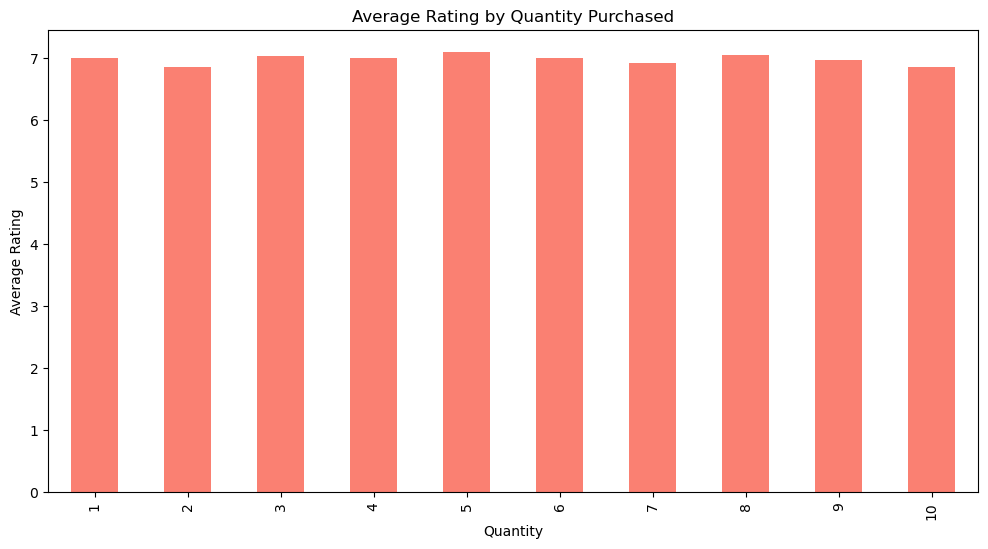

In [205]:
plt.figure(figsize=(12, 6))
avg_rating_by_quantity = data.groupby('Quantity')['Rating'].mean()
avg_rating_by_quantity.plot(kind='bar', color='salmon')
plt.title('Average Rating by Quantity Purchased')
plt.xlabel('Quantity')
plt.ylabel('Average Rating')
plt.show()


In [206]:
df_filtered.skew()

Unit price                 0.014036
Quantity                   0.021873
Tax 5%                     0.843948
Total                      0.843948
cogs                       0.843948
gross margin percentage    0.000000
gross income               0.843948
Rating                     0.005938
dtype: float64

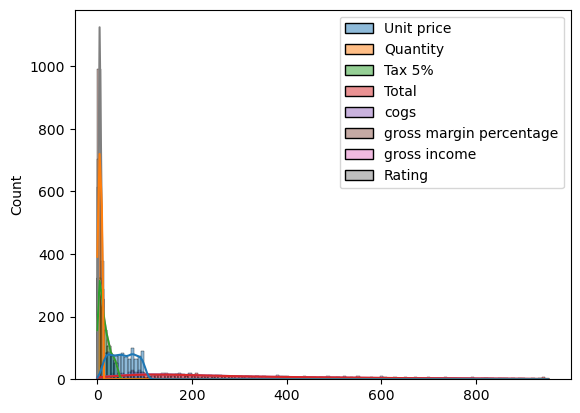

In [207]:
sns.histplot(data, kde=True)
plt.show()

In [208]:
data['Date'] = data['Date'].apply(pd.to_datetime)

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               991 non-null    object        
 1   Branch                   991 non-null    object        
 2   City                     991 non-null    object        
 3   Customer type            991 non-null    object        
 4   Gender                   991 non-null    object        
 5   Product line             991 non-null    object        
 6   Unit price               991 non-null    float64       
 7   Quantity                 991 non-null    int64         
 8   Tax 5%                   991 non-null    float64       
 9   Total                    991 non-null    float64       
 10  Date                     991 non-null    datetime64[ns]
 11  Time                     991 non-null    object        
 12  Payment                  991 non-null    

In [210]:
data['Time'] = data['Time'].apply(pd.to_datetime)

In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               991 non-null    object        
 1   Branch                   991 non-null    object        
 2   City                     991 non-null    object        
 3   Customer type            991 non-null    object        
 4   Gender                   991 non-null    object        
 5   Product line             991 non-null    object        
 6   Unit price               991 non-null    float64       
 7   Quantity                 991 non-null    int64         
 8   Tax 5%                   991 non-null    float64       
 9   Total                    991 non-null    float64       
 10  Date                     991 non-null    datetime64[ns]
 11  Time                     991 non-null    datetime64[ns]
 12  Payment                  991 non-null    

In [212]:
data['Month_Full']=data['Date'].dt.month_name()

In [213]:
data['Month'] = data['Date'].dt.month

In [214]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month_Full,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-11-18 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,January,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-11-18 10:29:00,Cash,76.40,4.761905,3.8200,9.6,March,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-11-18 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,March,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-11-18 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,January,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-11-18 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,February,2


In [215]:
sales_by_month = data.groupby(['Month','Month_Full'])['Total'].sum().reset_index()
sales_by_month

,Month,Month_Full,Total
0,1,January,111205.563
1,2,February,94116.729
2,3,March,108433.017


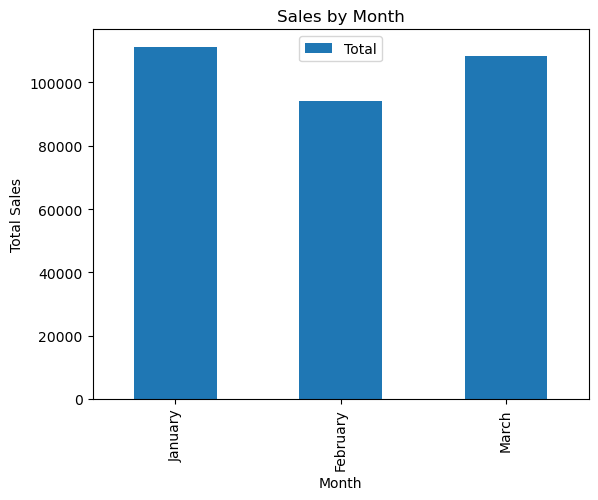

In [216]:
sales_by_month.plot(kind='bar', x='Month_Full', y='Total', 
                    title='Sales by Month', 
                    xlabel='Month', ylabel='Total Sales',
                    )
plt.show()

In [217]:
quantity_by_city = data.groupby(['City','Branch'])['Quantity'].sum().reset_index()
quantity_by_city

,City,Branch,Quantity
0,Mandalay,B,1800
1,Naypyitaw,C,1771
2,Yangon,A,1849


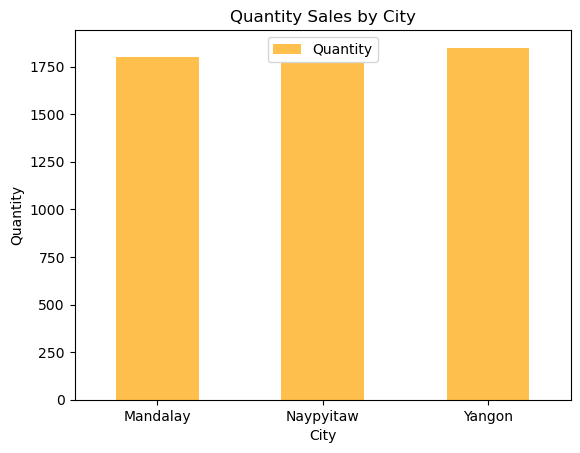

In [218]:
quantity_by_city.plot(kind='bar', x='City', y=['Quantity'],
                       title='Quantity Sales by City',
                       xlabel='City', ylabel='Quantity',
                       alpha=0.7,  # Adjust alpha for transparency (0.0 to 1.0)
                       color='orange')

# Rotate x-axis labels by 0 degrees
plt.xticks(rotation=0)
plt.show()

In [219]:
Total_by_city = data.groupby(['City','Branch'])['Total'].sum().reset_index()
Total_by_city

,City,Branch,Total
0,Mandalay,B,104152.7970
1,Naypyitaw,C,104441.4315
2,Yangon,A,105161.0805


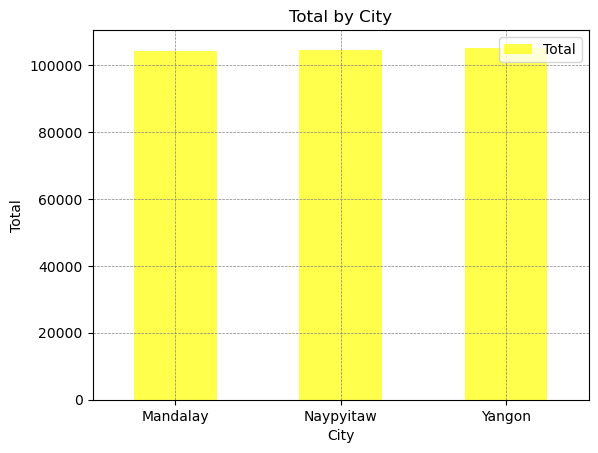

In [220]:
Total_by_city.plot(kind='bar', x='City', y='Total',
                       title='Total by City',
                       xlabel='City', ylabel='Total',
                       alpha=0.7,  # Adjust alpha for transparency (0.0 to 1.0)
                       color='yellow',
                      )

# Rotate x-axis labels by 0 degrees
plt.xticks(rotation=0)
# Add grid lines
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.show()

In [221]:
data['Hour'] = data['Time'].dt.hour

In [222]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month_Full,Month,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-11-18 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,January,1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-11-18 10:29:00,Cash,76.40,4.761905,3.8200,9.6,March,3,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-11-18 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,March,3,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-11-18 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,January,1,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-11-18 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,February,2,10


In [349]:
a=data.groupby(['Gender']).count()
a

,Invoice ID,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month_Full,Month,Hour
Gender,,,,,,,,,,,,,,,,,,,
Female,495,495,495,495,495,495,495,495,495,495,495,495,495,495,495,495,495,495,495
Male,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496


In [223]:
orders_placed_by_hour = data.groupby(['Hour'])['Invoice ID'].count().reset_index()
orders_placed_by_hour

,Hour,Invoice ID
0,10,101
1,11,90
2,12,89
3,13,99
4,14,82
5,15,102
6,16,75
7,17,73
8,18,93
9,19,113


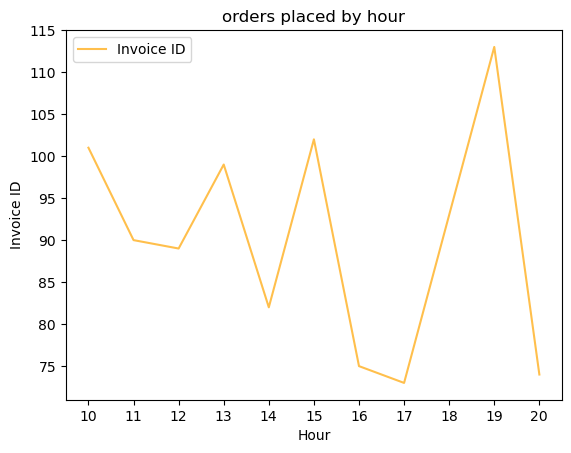

In [224]:
orders_placed_by_hour.plot(kind='line', x='Hour', y='Invoice ID',
                       title='orders placed by hour',
                       xlabel='Hour', ylabel='Invoice ID',
                       alpha=0.7,  # Adjust alpha for transparency (0.0 to 1.0)
                       color='orange')
plt.xticks(range(10,21))
# Rotate x-axis labels by 0 degrees
plt.xticks(rotation=0)
plt.show()

In [225]:
quantity_by_product = data.groupby(['Product line'])['Quantity'].sum().reset_index()
quantity_by_product

,Product line,Quantity
0,Electronic accessories,971
1,Fashion accessories,872
2,Food and beverages,942
3,Health and beauty,854
4,Home and lifestyle,871
5,Sports and travel,910


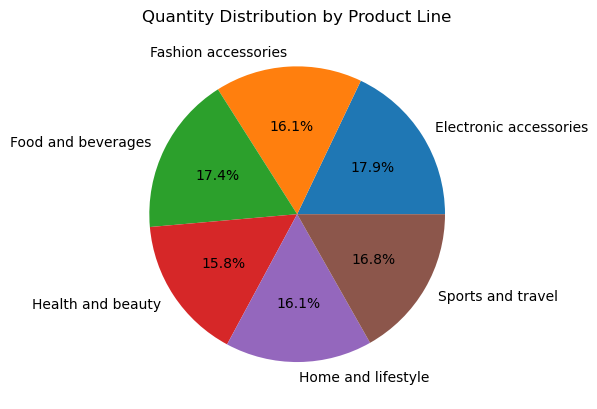

In [226]:
# Create the pie chart
plt.pie(quantity_by_product['Quantity'], labels=quantity_by_product['Product line'], autopct='%1.1f%%')

# Add title
plt.title('Quantity Distribution by Product Line')

# Show the plot
plt.show()

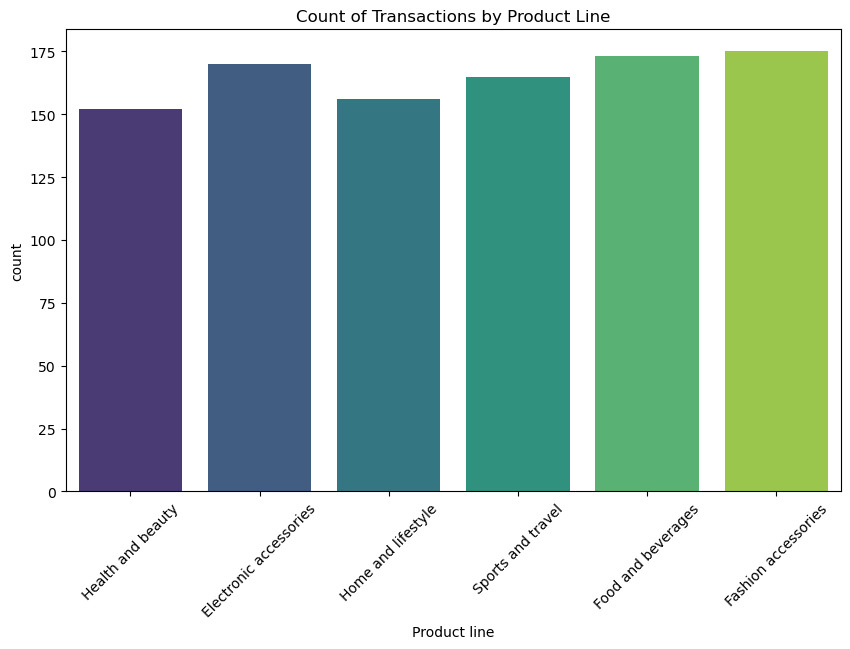

In [227]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Product line', palette='viridis')
plt.title('Count of Transactions by Product Line')
plt.xticks(rotation=45)
plt.show()


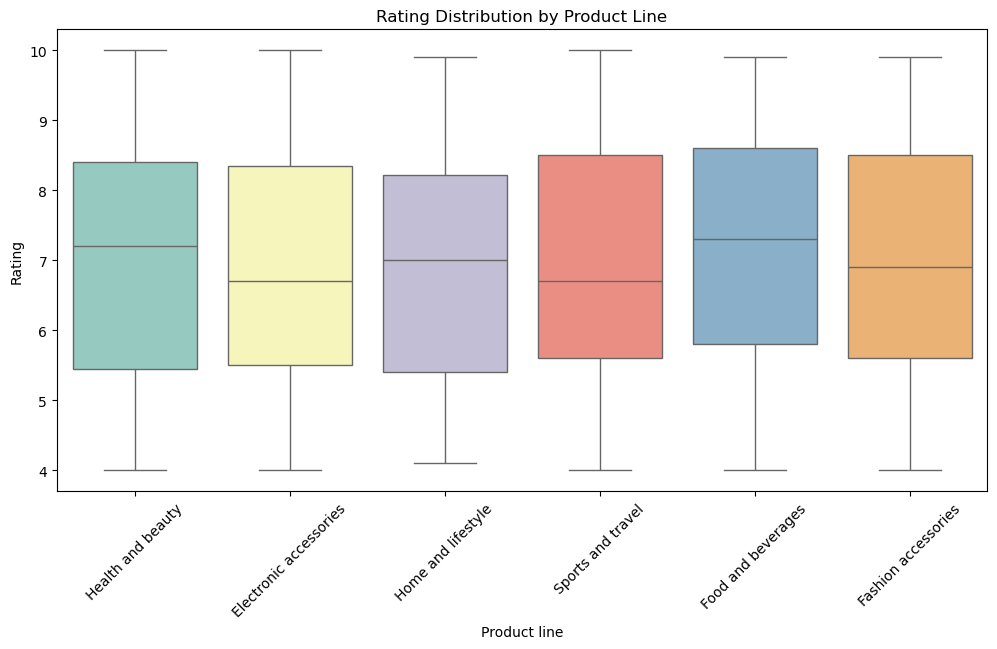

In [228]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Product line', y='Rating', palette='Set3')
plt.title('Rating Distribution by Product Line')
plt.xticks(rotation=45)
plt.show()


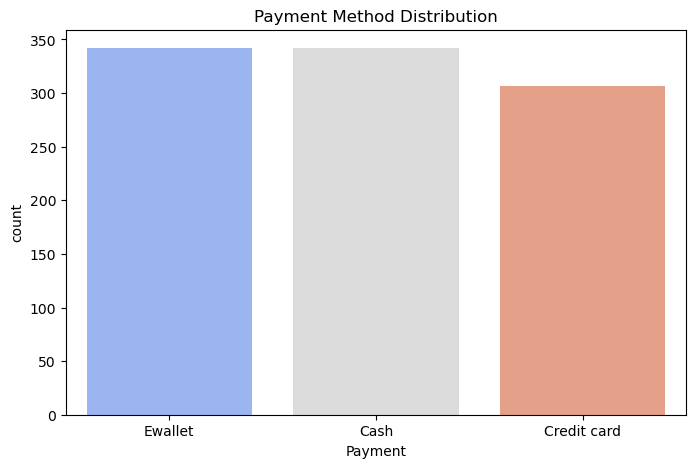

In [229]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Payment', palette='coolwarm')
plt.title('Payment Method Distribution')
plt.show()


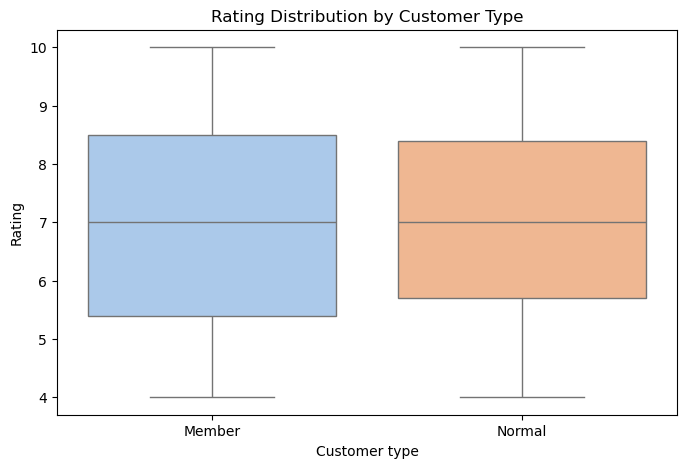

In [230]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Customer type', y='Rating', palette='pastel')
plt.title('Rating Distribution by Customer Type')
plt.show()


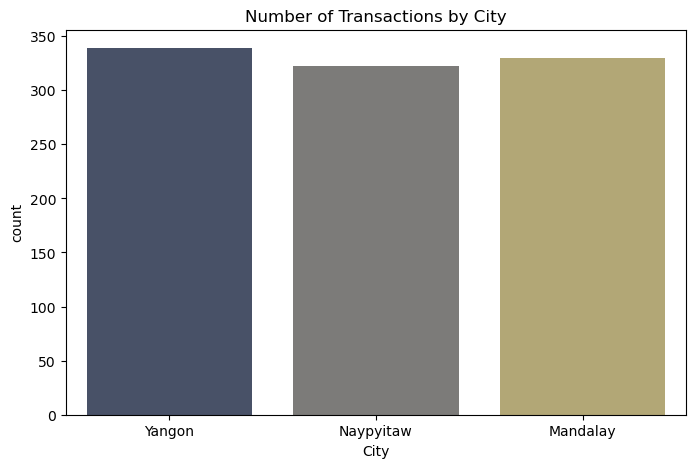

In [231]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='City', palette='cividis')
plt.title('Number of Transactions by City')
plt.show()


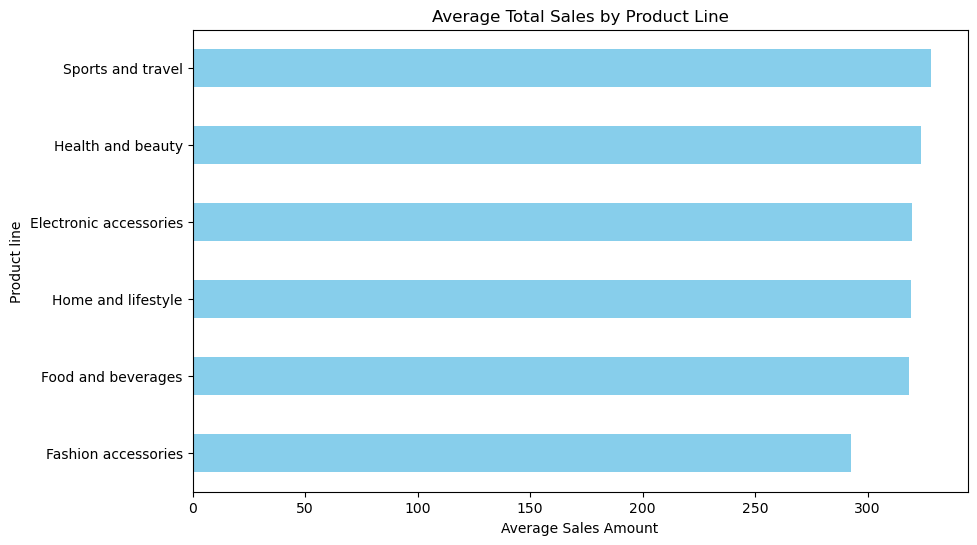

In [232]:
plt.figure(figsize=(10, 6))
avg_sales_by_product = data.groupby('Product line')['Total'].mean().sort_values()
avg_sales_by_product.plot(kind='barh', color='skyblue')
plt.title('Average Total Sales by Product Line')
plt.xlabel('Average Sales Amount')
plt.show()


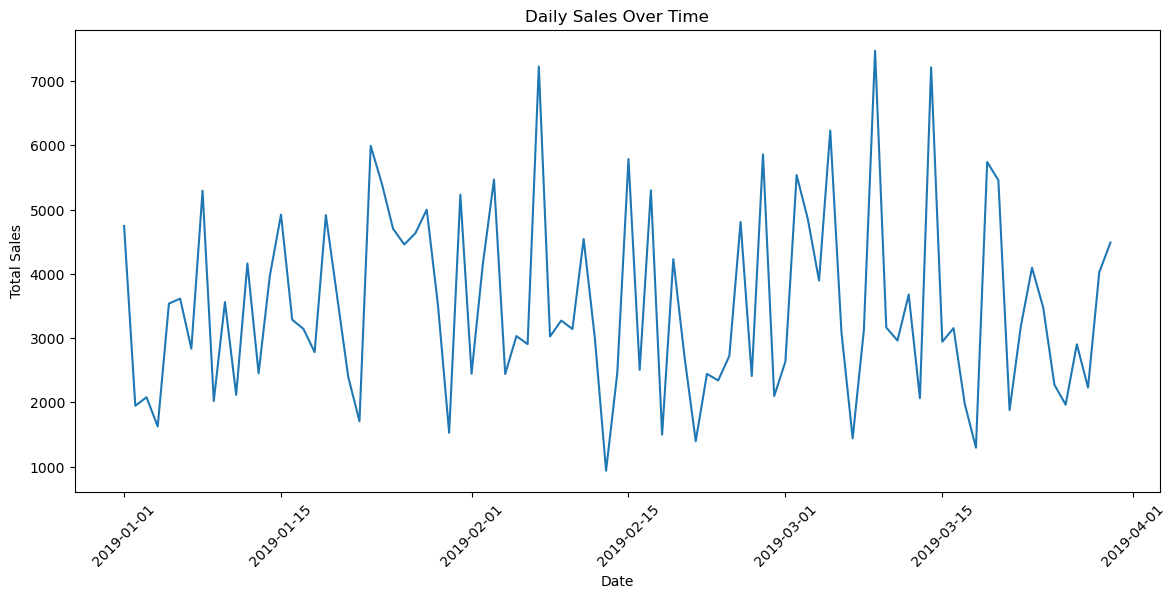

In [233]:
data['Date'] = pd.to_datetime(data['Date'])

daily_sales = data.groupby(data['Date'].dt.date)['Total'].sum()

plt.figure(figsize=(14, 6))
daily_sales.plot()
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


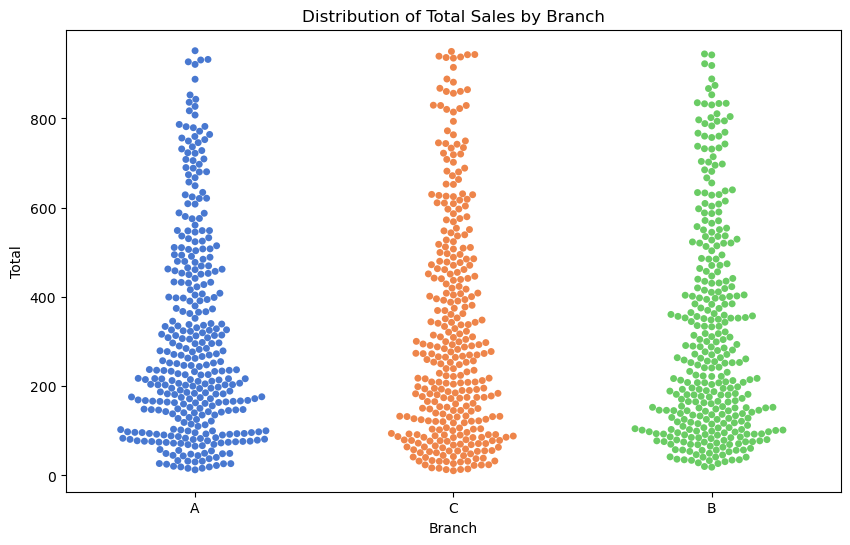

In [234]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=data, x='Branch', y='Total', palette='muted')
plt.title('Distribution of Total Sales by Branch')
plt.show()


In [235]:

data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month_Full,Month,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-11-18 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,January,1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-11-18 10:29:00,Cash,76.40,4.761905,3.8200,9.6,March,3,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-11-18 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,March,3,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-11-18 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,January,1,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-11-18 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,February,2,10


In [347]:
df_filtered.cov()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,692.301295,-0.879469,185.656540,3898.787339,3713.130799,0.0,185.656540,-0.114150
Quantity,-0.879469,8.439203,22.995116,482.897444,459.902327,0.0,22.995116,-0.048352
Tax 5%,185.656540,22.995116,128.131177,2690.754709,2562.623533,0.0,128.131177,-0.507094
Total,3898.787339,482.897444,2690.754709,56505.848899,53815.094189,0.0,2690.754709,-10.648968
cogs,3713.130799,459.902327,2562.623533,53815.094189,51252.470656,0.0,2562.623533,-10.141874
gross margin percentage,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
gross income,185.656540,22.995116,128.131177,2690.754709,2562.623533,0.0,128.131177,-0.507094
Rating,-0.114150,-0.048352,-0.507094,-10.648968,-10.141874,0.0,-0.507094,2.947942


In [236]:
corr = df_filtered.drop('gross margin percentage',axis = 1).corr()
corr

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
Unit price,1.000000,-0.011506,0.623355,0.623355,0.623355,0.623355,-0.002527
Quantity,-0.011506,1.000000,0.699290,0.699290,0.699290,0.699290,-0.009694
Tax 5%,0.623355,0.699290,1.000000,1.000000,1.000000,1.000000,-0.026092
Total,0.623355,0.699290,1.000000,1.000000,1.000000,1.000000,-0.026092
cogs,0.623355,0.699290,1.000000,1.000000,1.000000,1.000000,-0.026092
gross income,0.623355,0.699290,1.000000,1.000000,1.000000,1.000000,-0.026092
Rating,-0.002527,-0.009694,-0.026092,-0.026092,-0.026092,-0.026092,1.000000


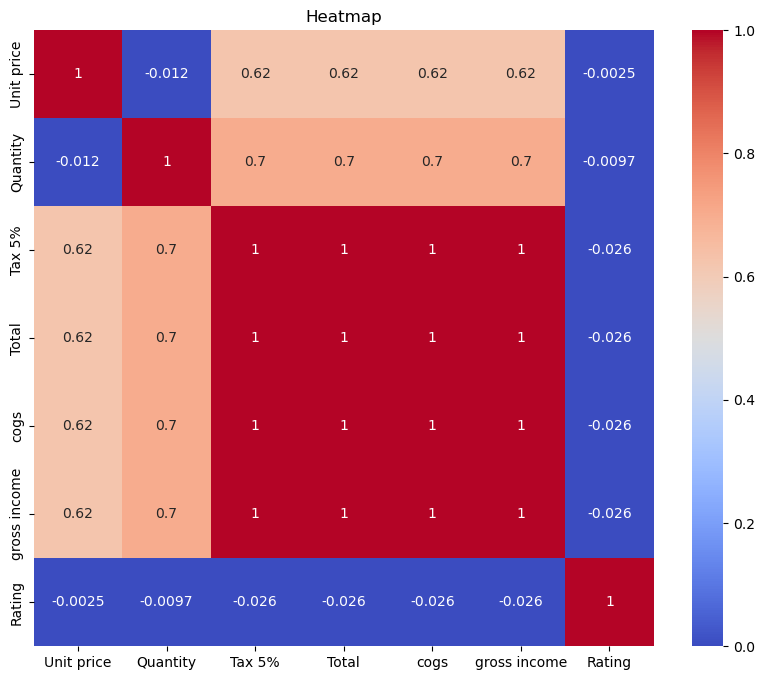

In [237]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Heatmap')
plt.show()

In [238]:
object_cols = data.select_dtypes(include=['object']).columns
object_cols

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Payment', 'Month_Full'],
      dtype='object')

## Categorical clolumns

In [240]:
data1 = data
data1

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month_Full,Month,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-11-18 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,January,1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-11-18 10:29:00,Cash,76.40,4.761905,3.8200,9.6,March,3,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-11-18 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,March,3,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-11-18 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,January,1,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-11-18 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,February,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2019-02-18,2024-11-18 11:40:00,Ewallet,60.95,4.761905,3.0475,5.9,February,2,11
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2024-11-18 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,January,1,13
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2024-11-18 13:22:00,Cash,31.84,4.761905,1.5920,7.7,February,2,13
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2024-11-18 15:33:00,Cash,65.82,4.761905,3.2910,4.1,February,2,15


In [241]:
#Apply one-hot encoding on 'Branch' and 'Customer type' columns
data1 = pd.get_dummies(data1, columns=['Branch', 'Customer type'], drop_first=True)
data1

,Invoice ID,City,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,...,cogs,gross margin percentage,gross income,Rating,Month_Full,Month,Hour,Branch_B,Branch_C,Customer type_Normal
0,750-67-8428,Yangon,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-11-18 13:08:00,...,522.83,4.761905,26.1415,9.1,January,1,13,False,False,False
1,226-31-3081,Naypyitaw,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-11-18 10:29:00,...,76.40,4.761905,3.8200,9.6,March,3,10,False,True,True
2,631-41-3108,Yangon,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-11-18 13:23:00,...,324.31,4.761905,16.2155,7.4,March,3,13,False,False,True
3,123-19-1176,Yangon,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-11-18 20:33:00,...,465.76,4.761905,23.2880,8.4,January,1,20,False,False,False
4,373-73-7910,Yangon,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-11-18 10:37:00,...,604.17,4.761905,30.2085,5.3,February,2,10,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,652-49-6720,Naypyitaw,Female,Electronic accessories,60.95,1,3.0475,63.9975,2019-02-18,2024-11-18 11:40:00,...,60.95,4.761905,3.0475,5.9,February,2,11,False,True,False
995,233-67-5758,Naypyitaw,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2024-11-18 13:46:00,...,40.35,4.761905,2.0175,6.2,January,1,13,False,True,True
997,727-02-1313,Yangon,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2024-11-18 13:22:00,...,31.84,4.761905,1.5920,7.7,February,2,13,False,False,False
998,347-56-2442,Yangon,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2024-11-18 15:33:00,...,65.82,4.761905,3.2910,4.1,February,2,15,False,False,True


In [242]:
# Initialize label encoder
label_encoder = LabelEncoder()

In [243]:
# Apply label encoding on 'Gender'
data1['Gender'] = label_encoder.fit_transform(data1['Gender'])
data1

,Invoice ID,City,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,...,cogs,gross margin percentage,gross income,Rating,Month_Full,Month,Hour,Branch_B,Branch_C,Customer type_Normal
0,750-67-8428,Yangon,0,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-11-18 13:08:00,...,522.83,4.761905,26.1415,9.1,January,1,13,False,False,False
1,226-31-3081,Naypyitaw,0,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-11-18 10:29:00,...,76.40,4.761905,3.8200,9.6,March,3,10,False,True,True
2,631-41-3108,Yangon,1,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-11-18 13:23:00,...,324.31,4.761905,16.2155,7.4,March,3,13,False,False,True
3,123-19-1176,Yangon,1,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-11-18 20:33:00,...,465.76,4.761905,23.2880,8.4,January,1,20,False,False,False
4,373-73-7910,Yangon,1,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-11-18 10:37:00,...,604.17,4.761905,30.2085,5.3,February,2,10,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,652-49-6720,Naypyitaw,0,Electronic accessories,60.95,1,3.0475,63.9975,2019-02-18,2024-11-18 11:40:00,...,60.95,4.761905,3.0475,5.9,February,2,11,False,True,False
995,233-67-5758,Naypyitaw,1,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2024-11-18 13:46:00,...,40.35,4.761905,2.0175,6.2,January,1,13,False,True,True
997,727-02-1313,Yangon,1,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2024-11-18 13:22:00,...,31.84,4.761905,1.5920,7.7,February,2,13,False,False,False
998,347-56-2442,Yangon,1,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2024-11-18 15:33:00,...,65.82,4.761905,3.2910,4.1,February,2,15,False,False,True


## Binary Encoding

In [245]:
!pip install category_encoders

In [246]:
import category_encoders as ce

In [247]:
# Columns to encode
columns_to_encode = ['City', 'Product line', 'Payment', 'Invoice ID', 'Month_Full']

In [248]:
# Apply binary encoding
encoder = ce.BinaryEncoder(cols=columns_to_encode)
data1 = encoder.fit_transform(data1)
data1

,Invoice ID_0,Invoice ID_1,Invoice ID_2,Invoice ID_3,Invoice ID_4,Invoice ID_5,Invoice ID_6,Invoice ID_7,Invoice ID_8,Invoice ID_9,...,gross margin percentage,gross income,Rating,Month_Full_0,Month_Full_1,Month,Hour,Branch_B,Branch_C,Customer type_Normal
0,0,0,0,0,0,0,0,0,0,1,...,4.761905,26.1415,9.1,0,1,1,13,False,False,False
1,0,0,0,0,0,0,0,0,1,0,...,4.761905,3.8200,9.6,1,0,3,10,False,True,True
2,0,0,0,0,0,0,0,0,1,1,...,4.761905,16.2155,7.4,1,0,3,13,False,False,True
3,0,0,0,0,0,0,0,1,0,0,...,4.761905,23.2880,8.4,0,1,1,20,False,False,False
4,0,0,0,0,0,0,0,1,0,1,...,4.761905,30.2085,5.3,1,1,2,10,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1,1,1,1,0,1,1,0,1,1,...,4.761905,3.0475,5.9,1,1,2,11,False,True,False
995,1,1,1,1,0,1,1,1,0,0,...,4.761905,2.0175,6.2,0,1,1,13,False,True,True
997,1,1,1,1,0,1,1,1,0,1,...,4.761905,1.5920,7.7,1,1,2,13,False,False,False
998,1,1,1,1,0,1,1,1,1,0,...,4.761905,3.2910,4.1,1,1,2,15,False,False,True


### train_test_split

In [250]:
y = data1['Rating']
y

0      9.1
1      9.6
2      7.4
3      8.4
4      5.3
      ... 
994    5.9
995    6.2
997    7.7
998    4.1
999    6.6
Name: Rating, Length: 991, dtype: float64

In [251]:
# Define features
column = ['Rating','Date','Time']
X = data1.drop(column, axis = 1)
X

,Invoice ID_0,Invoice ID_1,Invoice ID_2,Invoice ID_3,Invoice ID_4,Invoice ID_5,Invoice ID_6,Invoice ID_7,Invoice ID_8,Invoice ID_9,...,cogs,gross margin percentage,gross income,Month_Full_0,Month_Full_1,Month,Hour,Branch_B,Branch_C,Customer type_Normal
0,0,0,0,0,0,0,0,0,0,1,...,522.83,4.761905,26.1415,0,1,1,13,False,False,False
1,0,0,0,0,0,0,0,0,1,0,...,76.40,4.761905,3.8200,1,0,3,10,False,True,True
2,0,0,0,0,0,0,0,0,1,1,...,324.31,4.761905,16.2155,1,0,3,13,False,False,True
3,0,0,0,0,0,0,0,1,0,0,...,465.76,4.761905,23.2880,0,1,1,20,False,False,False
4,0,0,0,0,0,0,0,1,0,1,...,604.17,4.761905,30.2085,1,1,2,10,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1,1,1,1,0,1,1,0,1,1,...,60.95,4.761905,3.0475,1,1,2,11,False,True,False
995,1,1,1,1,0,1,1,1,0,0,...,40.35,4.761905,2.0175,0,1,1,13,False,True,True
997,1,1,1,1,0,1,1,1,0,1,...,31.84,4.761905,1.5920,1,1,2,13,False,False,False
998,1,1,1,1,0,1,1,1,1,0,...,65.82,4.761905,3.2910,1,1,2,15,False,False,True


In [252]:
X = pd.get_dummies(X, drop_first=True)

In [253]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

X = scaler.transform(X)


In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [255]:
X_train


array([[-2.90852741, -2.90852741,  1.09539056, ..., -2.20581527,
        -2.17508438, -2.98492709],
       [-2.90852741,  1.09539056, -2.90852741, ..., -2.20581527,
         2.38387077,  1.01517473],
       [-2.90852741, -2.90852741, -2.90852741, ..., -2.20581527,
         2.38387077, -2.98492709],
       ...,
       [ 1.09539056,  1.09539056, -2.90852741, ..., -2.20581527,
         2.38387077, -2.98492709],
       [-2.90852741,  1.09539056,  1.09539056, ..., -2.20581527,
         2.38387077, -2.98492709],
       [-2.90852741, -2.90852741, -2.90852741, ..., -2.20581527,
         2.38387077,  1.01517473]])

In [256]:
print("The End")
print("Thank You")

The End
Thank You
